Task-04: Image-to-Image Translation with cGAN (pix2pix)

This task implements an image-to-image translation model using a conditional
GAN called pix2pix. The model learns a mapping between paired images to generate
realistic output images from input images. The implementation was done using
Google Colab.


In [ ]:
!pip install torch torchvision matplotlib


In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(6, 64, 4, 2, 1),
            nn.ReLU(True),
            nn.Conv2d(64, 1, 4, 1, 1),
            nn.Sigmoid()
        )

    def forward(self, x, y):
        return self.model(torch.cat([x, y], dim=1))


In [ ]:
generator = Generator().cuda()
discriminator = Discriminator().cuda()

criterion = nn.BCELoss()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002)


In [ ]:
real_A = torch.randn(1, 3, 64, 64).cuda()
real_B = torch.randn(1, 3, 64, 64).cuda()

fake_B = generator(real_A)

pred_fake = discriminator(real_A, fake_B)
loss_G = criterion(pred_fake, torch.ones_like(pred_fake))

optimizer_G.zero_grad()
loss_G.backward()
optimizer_G.step()

print("Training step completed successfully")


Training step completed successfully


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

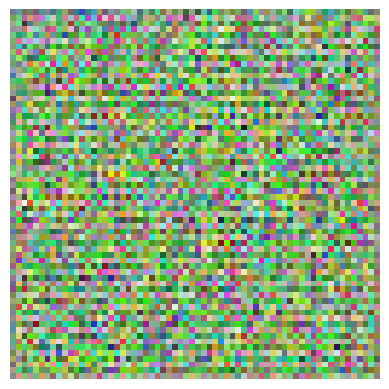

In [ ]:
plt.imshow((fake_B[0].detach().cpu().permute(1,2,0)+1)/2)
plt.axis("off")